<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Import-libraries" data-toc-modified-id="Import-libraries-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Import libraries</a></span></li><li><span><a href="#Figure-7" data-toc-modified-id="Figure-7-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Figure 7</a></span><ul class="toc-item"><li><span><a href="#Calculate-Gini-index" data-toc-modified-id="Calculate-Gini-index-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Calculate Gini index</a></span><ul class="toc-item"><li><span><a href="#Load-data" data-toc-modified-id="Load-data-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>Load data</a></span></li><li><span><a href="#Calculation" data-toc-modified-id="Calculation-2.1.2"><span class="toc-item-num">2.1.2&nbsp;&nbsp;</span>Calculation</a></span></li><li><span><a href="#Output-data" data-toc-modified-id="Output-data-2.1.3"><span class="toc-item-num">2.1.3&nbsp;&nbsp;</span>Output data</a></span></li></ul></li><li><span><a href="#Load-data" data-toc-modified-id="Load-data-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Load data</a></span></li><li><span><a href="#Process-data" data-toc-modified-id="Process-data-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Process data</a></span></li><li><span><a href="#Visualization" data-toc-modified-id="Visualization-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Visualization</a></span></li></ul></li><li><span><a href="#S12-S13" data-toc-modified-id="S12-S13-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>S12-S13</a></span><ul class="toc-item"><li><span><a href="#Calculation" data-toc-modified-id="Calculation-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Calculation</a></span></li><li><span><a href="#Load-data" data-toc-modified-id="Load-data-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Load data</a></span></li><li><span><a href="#Visualization" data-toc-modified-id="Visualization-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Visualization</a></span><ul class="toc-item"><li><span><a href="#Orographic" data-toc-modified-id="Orographic-3.3.1"><span class="toc-item-num">3.3.1&nbsp;&nbsp;</span>Orographic</a></span></li><li><span><a href="#Non-orographic" data-toc-modified-id="Non-orographic-3.3.2"><span class="toc-item-num">3.3.2&nbsp;&nbsp;</span>Non-orographic</a></span></li></ul></li></ul></li><li><span><a href="#Figure-S3" data-toc-modified-id="Figure-S3-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Figure S3</a></span><ul class="toc-item"><li><span><a href="#Load-data" data-toc-modified-id="Load-data-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Load data</a></span></li><li><span><a href="#Process-data" data-toc-modified-id="Process-data-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Process data</a></span></li></ul></li><li><span><a href="#Supplementary-maps" data-toc-modified-id="Supplementary-maps-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Supplementary maps</a></span></li></ul></div>

# Import libraries

In [38]:
import xarray as xr
import matplotlib.pyplot as plt
import xarray.ufuncs as xrf
import numpy as np
import pandas as pd
import cartopy.crs as ccrs
import seaborn as sns
import shapely.geometry as sgeom
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import matplotlib.ticker as ticker
import matplotlib.lines as mlines
import matplotlib.patches as mpatches
import xclim as xc
from scipy.special import erf

In [39]:
%reload_ext watermark
%watermark --iversions -v -m

seaborn 0.9.0
numpy   1.17.3
xarray  0.14.1
pandas  1.0.1
xclim   0.15.2
CPython 3.6.9
IPython 7.1.1

compiler   : GCC 8.4.0
system     : Linux
release    : 4.15.0-96-generic
machine    : x86_64
processor  : x86_64
CPU cores  : 8
interpreter: 64bit


In [30]:
ch_plevs = [100,70,50,20,10,1]

sel_dict_ea = dict(lon =slice(110,145), lat=slice(30,48), plev = ch_plevs) #EAst Asia; box2 = sgeom.box(minx=110, maxx=145, miny=27.5, maxy=52)
sel_dict_hi = dict(lon =slice(70,102.5), lat=slice(20,40), plev = ch_plevs) #Himalayas; box = sgeom.box(minx=70, maxx=105, miny=20, maxy=42)
sel_dict_wa = dict(lon =slice(-125+360,-102.5+360), lat=slice(27.5,52), plev = ch_plevs) #Western America; box3 = sgeom.box(minx=-125, maxx=-102.5, miny=27.5, maxy=52)

sel_dict_areas = [sel_dict_hi, sel_dict_wa, sel_dict_ea]
names = ['himalayas', 'westamer', 'eastasia']

# Figure 7

## Calculate Gini index

In [15]:
inpath = '/mnt/4data/CMAM/0A.daily/'

### Load data

In [25]:
ds_ov = xr.open_mfdataset(f'{inpath}ogwfluxn/ogwfluxn_6hrPlev_CMAM_CMAM30-SD_r1i1p1_*010100-*123118.nc', \
                       concat_dim='time', combine='nested')
ds_ou = xr.open_mfdataset(f'{inpath}ogwfluxe/ogwfluxe_6hrPlev_CMAM_CMAM30-SD_r1i1p1_*010100-*123118.nc', \
                       concat_dim='time', combine='nested')
ds_nv = xr.open_mfdataset(f'{inpath}nogwfluxn/nogwfluxn_6hrPlev_CMAM_CMAM30-SD_r1i1p1_*010100-*123118.nc', \
                       concat_dim='time', combine='nested')
ds_nu = xr.open_mfdataset(f'{inpath}nogwfluxe/nogwfluxe_6hrPlev_CMAM_CMAM30-SD_r1i1p1_*010100-*123118.nc', \
                       concat_dim='time', combine='nested')

### Calculation

In [473]:
sel_dict = dict(plev = np.array(ch_plevs)*100., lat = slice(20,60)) 
ds_o_sel = xrf.hypot(ds_ou['ogwfluxe'].sel(**sel_dict), ds_ov['ogwfluxn'].sel(**sel_dict))
ds_o_sel.name = 'oro'
ds_n_sel = xrf.hypot(ds_nu['nogwfluxe'], ds_nv['nogwfluxn']).sel(**sel_dict).mean(['lat','lon'])
ds_n_sel.name = 'noro'
ds_all = xr.merge([ds_n_sel, ds_o_sel]).to_array().chunk({'plev': 1})
ds_all

<xarray.DataArray 'stack-f25bb5bc0c356c654f68b3fe37d3e686' (variable: 2, time: 46720, plev: 6)>
dask.array<rechunk-merge, shape=(2, 46720, 6), dtype=float32, chunksize=(1, 1460, 1), chunktype=numpy.ndarray>
Coordinates:
  * plev      (plev) float64 1e+04 7e+03 5e+03 2e+03 1e+03 100.0
  * time      (time) object 1979-01-01 00:00:00 ... 2010-12-31 18:00:00
  * variable  (variable) <U4 'noro' 'oro'

In [37]:
def gini_calc(da):
    dim = 'time'
    m = da[dim].shape[0]
    #print(da)
    ds_sel_sorted = xr.DataArray(np.sort(da, axis = 1), coords=da.coords) # time dimension is the second
    ds_sel_cumsum = ds_sel_sorted.cumsum(dim)
    ma = xr.DataArray(np.arange(1, m+1), dims=[dim], coords={dim: da.coords[dim]})
    ds_sel_mean = ds_sel_sorted.mean(dim)
    numer = ds_sel_mean*ma - ds_sel_cumsum
    denom = ds_sel_mean*ma
    return numer.sum('time') / denom.sum('time')

In [38]:
gini_res = ds_all.groupby('time.month').apply(gini_calc)

### Output data

In [39]:
gini_res.attrs['units'] = ''
gini_res.attrs['long_name'] = 'Gini index'
gini_res.name = 'gini'
gini_res['plev'] = gini_res['plev']/100.
gini_res['plev'].attrs['units'] = 'hPa'
gini_res_ds = gini_res.to_dataset(name = 'Gini')
gini_res_ds.to_netcdf(f'{inpath}gini-index_on_strato-gwfluxes_monthly_20-60N_mean.nc')

## Load data

In [25]:
gini_res_NH = xr.open_dataset(f'{inpath}gini-index_on_strato-gwfluxes_monthly_20-60N_mean.nc', engine = 'h5netcdf')
gini_res_NH

<xarray.Dataset>
Dimensions:   (month: 12, plev: 6, variable: 2)
Coordinates:
  * month     (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
  * plev      (plev) float64 100.0 70.0 50.0 10.0 20.0 1.0
  * variable  (variable) object 'noro' 'oro'
Data variables:
    Gini      (variable, month, plev) float64 ...

In [26]:
gini_res = xr.open_dataset(f'{inpath}gini-index_on_strato-gwfluxes_monthly.nc', \
                          engine = 'h5netcdf')['gini']
gini_res['plev'] = gini_res['plev']/100.
gini_res['plev'].attrs['units'] = 'hPa'
gini_res

<xarray.DataArray 'gini' (variable: 2, month: 12, plev: 20, lat: 48, lon: 96)>
[2211840 values with dtype=float64]
Coordinates:
  * plev      (plev) float64 100.0 90.0 80.0 70.0 60.0 ... 4.0 3.0 2.0 1.5 1.0
  * lat       (lat) float64 -87.16 -83.48 -79.78 -76.07 ... 79.78 83.48 87.16
  * lon       (lon) float64 0.0 3.75 7.5 11.25 15.0 ... 345.0 348.8 352.5 356.2
  * variable  (variable) object 'noro' 'oro'
  * month     (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Attributes:
    units:      
    long_name:  Gini index

## Process data

In [31]:
df_ls = []
oro_labels = ['HI (OGW)','WA (OGW)','EA (OGW)']
noro_labels = ['HI (NGW)', 'WA (NGW)', 'EA (NGW)']
labels = oro_labels + noro_labels
          

i = 0
for var in ['oro', 'noro']:
    gini_res_sel = gini_res.sel(variable = var)
    for name, sel_dict in zip(names, sel_dict_areas):
        print(i, name, sel_dict, var)
        #print(gini_res_sel)
        temp = gini_res_sel.sel(**sel_dict)#.mean(['lat','lon'])#mean(['lat','lon'])
        temp.name = 'gini'#
        
        df = temp.squeeze().reset_coords(drop = True).to_dataframe().reset_index()#.T
        df['hotspot'] = labels[i]#f'{name}_{var}'
        i+=1
        df_ls.append(df)

0 himalayas {'lon': slice(70, 102.5, None), 'lat': slice(20, 40, None), 'plev': [100, 70, 50, 20, 10, 1]} oro
1 westamer {'lon': slice(235, 257.5, None), 'lat': slice(27.5, 52, None), 'plev': [100, 70, 50, 20, 10, 1]} oro
2 eastasia {'lon': slice(110, 145, None), 'lat': slice(30, 48, None), 'plev': [100, 70, 50, 20, 10, 1]} oro
3 himalayas {'lon': slice(70, 102.5, None), 'lat': slice(20, 40, None), 'plev': [100, 70, 50, 20, 10, 1]} noro
4 westamer {'lon': slice(235, 257.5, None), 'lat': slice(27.5, 52, None), 'plev': [100, 70, 50, 20, 10, 1]} noro
5 eastasia {'lon': slice(110, 145, None), 'lat': slice(30, 48, None), 'plev': [100, 70, 50, 20, 10, 1]} noro


In [32]:
df_all = pd.concat(df_ls, axis = 0)

## Visualization

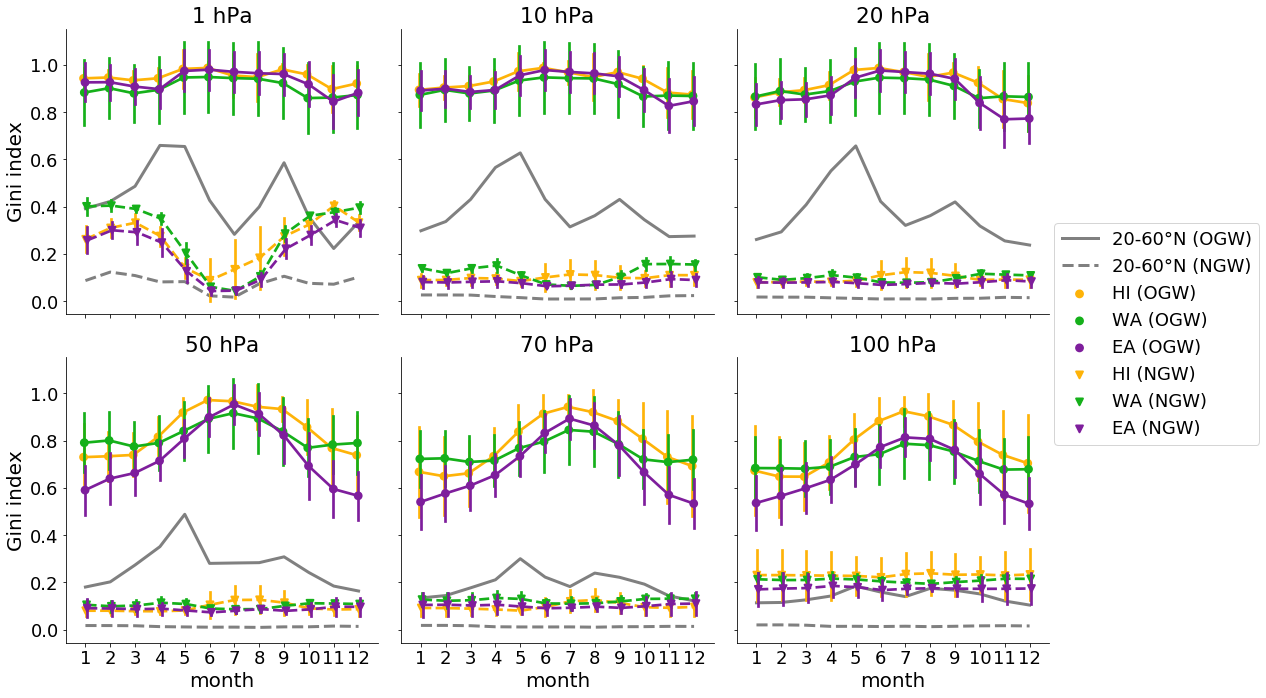

In [33]:
nh  = len(names)
pal = sns.color_palette(n_colors = nh)
colors = ["amber", "green", "purple"] 
pal = sns.xkcd_palette(colors)

plt.rcParams.update({'font.size': 18})

g = sns.catplot(x="month", y="gini", hue="hotspot", col="plev", col_wrap = 3,  \
                data=df_all, kind="point", dodge=True, ci = 'sd', \
                linestyles=["-"]*nh+["--"]*nh, markers=['o']*nh+['v']*nh,\
                palette = pal, legend = False)
g.set_ylabels('Gini index', fontsize = 20)
g.set_xlabels('month', fontsize = 20)

for ax, col_name in zip(g.axes, g.col_names):   
    temp = gini_res_NH['Gini'].sel(plev = col_name)
    ax.plot(temp.sel(variable='oro'), color = 'gray', lw = 3, \
            label = '20-60°N (OGW)')
    ax.plot(temp.sel(variable='noro'), color = 'gray', \
            ls = '--', lw = 3, label = '20-60°N (NGW)')   
   
    ax.set_title(f'{int(col_name)} hPa')


g.set_ylabels('Gini index', fontsize = 20)
g.set_xlabels('month', fontsize = 20)



plt.legend(loc='upper right', bbox_to_anchor=(1.7, 1.5))    
#plt.savefig('gini_index_hotspots.pdf', bbox_inches = 'tight')

# S12-S13

## Calculation

In [ ]:
sel_dict = dict(plev = np.array(ch_plevs)*100.) # plev = slice(10000,100)) # 
ds_o_sel = xrf.hypot(ds_ou['ogwfluxe'].sel(**sel_dict), ds_ov['ogwfluxn'].sel(**sel_dict))
ds_o_sel.name = 'oro'
ds_n_sel = xrf.hypot(ds_nu['nogwfluxe'].sel(**sel_dict), ds_nv['nogwfluxn'].sel(**sel_dict))
ds_n_sel.name = 'noro'
ds_all = xr.merge([ds_n_sel, ds_o_sel]).to_array().chunk({'plev': 1})

In [ ]:
def lognorm_wrapper(da):
    out = xc.indices.generic.fit(da, dist = 'lognorm')
    return out

In [ ]:
ind_oro = (ds_all.sel(variable='oro')*1000).groupby('time.month').apply(lognorm_wrapper).to_dataset(dim='dparams')
ind_oro.attrs['units'] = 'mPa'
ind_oro['plev'] = ind_oro['plev']/100.
ind_oro['plev'].attrs['units'] = 'hPa'
ind_oro.to_netcdf(f'{inpath}lognorm_params_on_strato-gwfluxes_monthly_oro.nc')

In [ ]:
ind_oro = (ds_all.sel(variable='noro')*1000).groupby('time.month').apply(lognorm_wrapper).to_dataset(dim='dparams')
ind_oro.attrs['units'] = 'mPa'
ind_oro['plev'] = ind_oro['plev']/100.
ind_oro['plev'].attrs['units'] = 'hPa'
ind_oro.to_netcdf(f'{inpath}lognorm_params_on_strato-gwfluxes_monthly_noro.nc')

## Load data

In [36]:
ind_oro = xr.open_dataset(f'{inpath}lognorm_params_on_strato-gwfluxes_monthly_oro.nc', engine = 'h5netcdf')['s']
ind_noro = xr.open_dataset(f'{inpath}lognorm_params_on_strato-gwfluxes_monthly_noro.nc', engine = 'h5netcdf')['s']
ind_both = xr.concat([ind_oro, ind_noro], dim='variable')

## Visualization

In [44]:
selection = ['lat', 'lon']

### Orographic 

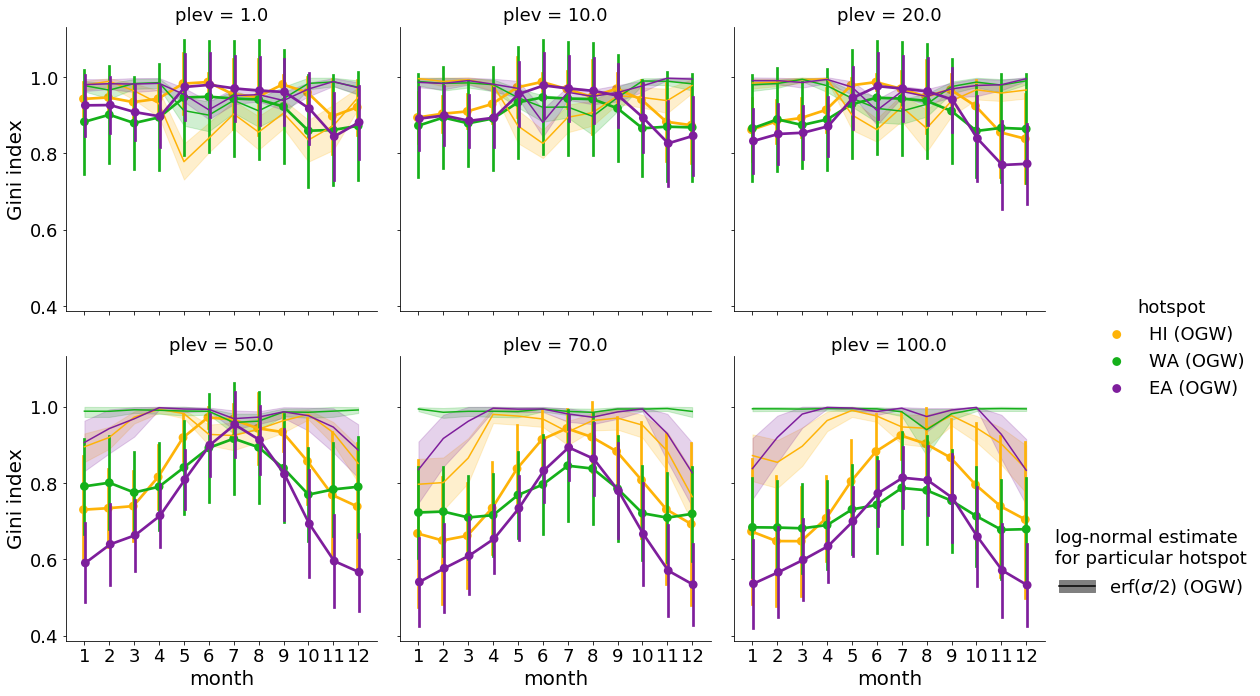

In [45]:
sel_variable = 'oro'

nh  = len(names)
pal = sns.color_palette(n_colors = nh)
colors = ["amber", "green", "purple"] 
pal = sns.xkcd_palette(colors)

plt.rcParams.update({'font.size': 18})

g = sns.catplot(x="month", y="gini", hue="hotspot", col="plev", col_wrap = 3,  \
                data=df_all[df_all['hotspot'].isin(oro_labels)], kind="point", dodge=True, ci = 'sd', \
                linestyles=["-"]*nh+["--"]*nh, markers=['o']*nh+['v']*nh,\
                palette = pal, legend = 'full')#.add_legend(label_order=labels)



for ax, col_name in zip(g.axes, g.col_names):
    temp = (erf(ind_both/2)).sel(plev = col_name, variable = sel_variable)
    temp['month'] = temp['month']-1

    for si, (name, sel_dict) in enumerate(zip(names, sel_dict_areas)):
        #print(name, sel_dict, var)        
        filtered = dict(filter(lambda i: i[0] in selection, sel_dict.items()))

        temp_hs = temp.sel(**filtered)
        df_temp_hs = temp_hs.squeeze().reset_coords(drop = True).to_dataframe().reset_index()
        p_ls = sns.lineplot(x="month", y="s", data=df_temp_hs, \
                 color = pal[si], legend = False, ax = ax)
    
    #sys.exit()
g.set_ylabels('Gini index', fontsize = 20)
g.set_xlabels('month', fontsize = 20)    

gray_patch = mpatches.Patch(color='gray')#, label=r'$\mathrm{erf}(\sigma /2)$ (OGW)')
oro_ln_line = mlines.Line2D([], [], color='k')#, label=r'$\mathrm{erf}(\sigma /2)$ (OGW)')
plt.legend([(gray_patch, oro_ln_line)], \
           [r'$\mathrm{erf}(\sigma /2)$ (OGW)'], \
           title = 'log-normal estimate\nfor particular hotspot', frameon=False, \
           bbox_to_anchor=(1.7, 0.1), loc='lower right')

#plt.savefig(f'gini_index_hotspots_erf-{sel_variable}.pdf', bbox_inches = 'tight')

### Non-orographic

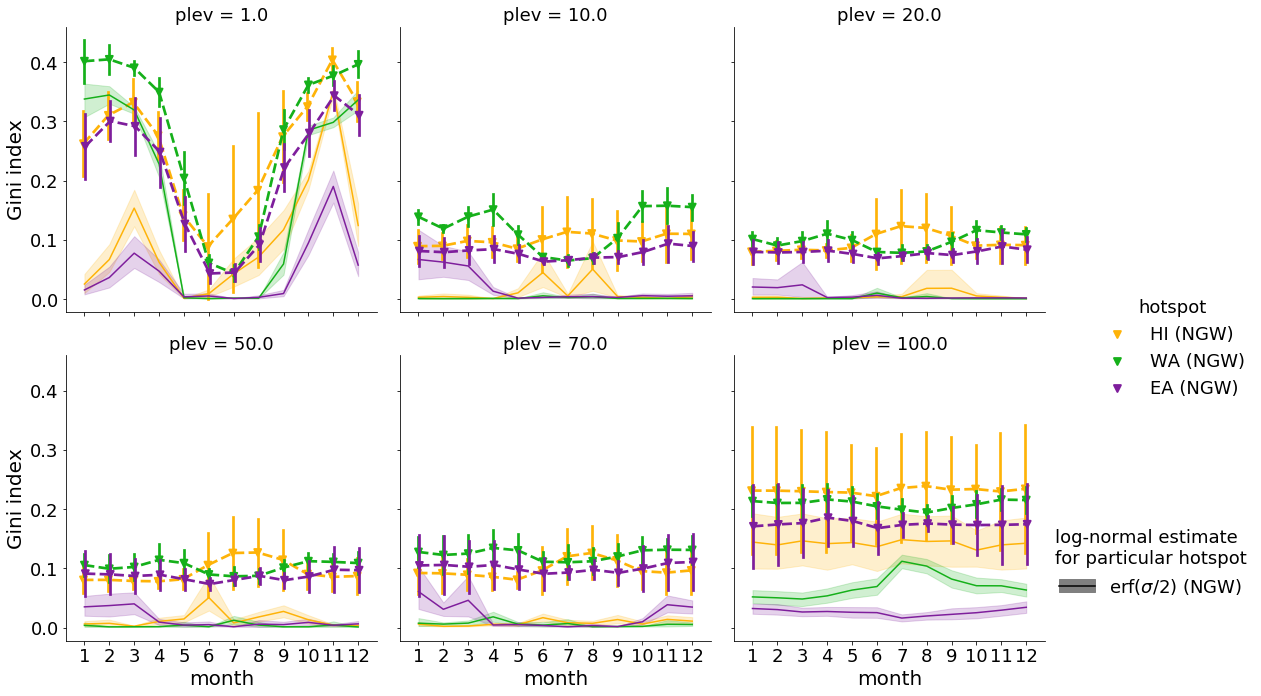

In [46]:
sel_variable = 'noro'

nh  = len(names)
pal = sns.color_palette(n_colors = nh)
colors = ["amber", "green", "purple"] 
pal = sns.xkcd_palette(colors)

plt.rcParams.update({'font.size': 18})

g = sns.catplot(x="month", y="gini", hue="hotspot", col="plev", col_wrap = 3,  \
                data=df_all[df_all['hotspot'].isin(noro_labels)], kind="point", dodge=True, ci = 'sd', \
                linestyles=["--"]*nh, markers=['v']*nh,\
                palette = pal, legend = 'full')#.add_legend(label_order=labels)


kwargs = dict(linestyle = '--')
for ax, col_name in zip(g.axes, g.col_names):
    temp = (erf(ind_both/2)).sel(plev = col_name, variable = sel_variable)
    temp['month'] = temp['month']-1

    for si, (name, sel_dict) in enumerate(zip(names, sel_dict_areas)):
        #print(name, sel_dict, var)
        filtered = dict(filter(lambda i: i[0] in selection, sel_dict.items()))

        temp_hs = temp.sel(**filtered)
        df_temp_hs = temp_hs.squeeze().reset_coords(drop = True).to_dataframe().reset_index()
        p_ls = sns.lineplot(x="month", y="s", \
                            data=df_temp_hs, \
                 color = pal[si], legend = False, ax = ax, **kwargs)
        #p_ls.lines[0].set_linestyle("--")
    
    #sys.exit()
g.set_ylabels('Gini index', fontsize = 20)
g.set_xlabels('month', fontsize = 20)

gray_patch = mpatches.Patch(color='gray')#, label=r'$\mathrm{erf}(\sigma /2)$ (OGW)')
noro_ln_line = mlines.Line2D([], [], color='k')#, linestyle = 'dashed')#, label=r'$\mathrm{erf}(\sigma /2)$ (NGW)')
plt.legend([(gray_patch, noro_ln_line)], \
           [r'$\mathrm{erf}(\sigma /2)$ (NGW)'], \
           title = 'log-normal estimate\nfor particular hotspot', frameon=False, \
           bbox_to_anchor=(1.7, 0.1), loc='lower right')

#plt.savefig(f'gini_index_hotspots_erf-{sel_variable}.pdf', bbox_inches = 'tight')

# Figure S3

In [13]:
#ch_months = 
sel_dict_ea = dict(lon =slice(110,145), lat=slice(30,48)) #EAst Asia; box2 = sgeom.box(minx=110, maxx=145, miny=27.5, maxy=52)
sel_dict_hi = dict(lon =slice(70,102.5), lat=slice(20,40)) #Himalayas; box = sgeom.box(minx=70, maxx=105, miny=20, maxy=42)
sel_dict_wa = dict(lon =slice(-125+360,-102.5+360), lat=slice(27.5,52)) #Western America; box3 = sgeom.box(minx=-125, maxx=-102.5, miny=27.5, maxy=52)
sel_dict_mo = dict(lon = slice(85,105), lat = slice(48,55))
sel_dict_areas = [sel_dict_hi, sel_dict_wa, sel_dict_ea]#, sel_dict_mo]
names = ['himalayas', 'westamer', 'eastasia']#, 'mongo']

## Load data

In [18]:
gini_res = xr.open_dataset(f'{inpath}gini-index_on_strato-gwfluxes_monthly_850hPa.nc', \
                          engine = 'h5netcdf')['gini']
gini_res

<xarray.DataArray 'gini' (variable: 2, month: 12, lat: 48, lon: 96)>
[110592 values with dtype=float64]
Coordinates:
    plev      float64 ...
  * lat       (lat) float64 -87.16 -83.48 -79.78 -76.07 ... 79.78 83.48 87.16
  * lon       (lon) float64 0.0 3.75 7.5 11.25 15.0 ... 345.0 348.8 352.5 356.2
  * variable  (variable) object 'noro' 'oro'
  * month     (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Attributes:
    units:      
    long_name:  Gini index

## Process data

In [19]:
df_ls = []
labels = ['HI (OGW)','WA (OGW)','EA (OGW)', \
          'HI (NGW)', 'WA (NGW)', 'EA (NGW)']

i=0
for var in ['oro']:#, 'noro']:
    gini_res_sel = gini_res.sel(variable = var)
    for name, sel_dict in zip(names, sel_dict_areas):
        #print(name)
        #print(gini_res_sel)
        temp = gini_res_sel.sel(**sel_dict)#.mean(['lat','lon'])#mean(['lat','lon'])
        temp.name = 'gini'#
        
        df = temp.squeeze().reset_coords(drop = True).to_dataframe().reset_index()#.T
        df['hotspot'] = labels[i]#f'{name}_{var}'
        i+=1
        df_ls.append(df)

In [20]:
df_all = pd.concat(df_ls, axis = 0)
df_all.head(n = 6)

,month,lat,lon,gini,hotspot
0,1,20.411238,71.25,0.647975,HI (OGW)
1,1,20.411238,75.00,0.756163,HI (OGW)
2,1,20.411238,78.75,0.759488,HI (OGW)
3,1,20.411238,82.50,0.727764,HI (OGW)
4,1,20.411238,86.25,0.740064,HI (OGW)
5,1,20.411238,90.00,0.639485,HI (OGW)


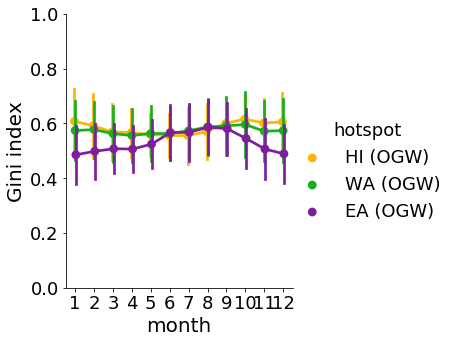

In [21]:
ls = ["-", "-" , '-']#, "--", "--" , '--'
g = sns.catplot(x="month", y="gini", hue="hotspot",  \
                data=df_all, kind="point", dodge=True, ci = 'sd', \
                linestyles=ls, \
                palette = pal)
g.set_ylabels('Gini index', fontsize = 20)
g.set_xlabels('month', fontsize = 20)
g.set(ylim=(0,1))
#plt.savefig('gini_index_oro@850hPa.pdf', bbox_inches = 'tight')

# Supplementary maps

In [49]:
def plot_map(gini_res, variable, months, ch_plevs):
    plt.rcParams.update({'font.size': 16})
    projection= ccrs.PlateCarree()#ccrs.Robinson(central_longitude=180) #Mollweide()#Orthographic(-80, 35)
    #fig = plt.figure(figsize = (12,9))
    #ax = plt.axes(projection=projection)
    nfigs = 3*len(ch_plevs)
    sel_dict = dict(variable = variable, month = months, plev = ch_plevs)
    p  = gini_res.sel(**sel_dict).plot(vmin = 0, vmax = 1, row = 'plev', \
                                            transform=ccrs.PlateCarree(), \
                                            col='month', size = 5, \
                                            subplot_kws = {'projection': projection}, \
                                            cbar_kwargs = {'orientation': 'horizontal'})

    lon_formatter = LongitudeFormatter(number_format='.1f', \
                                           degree_symbol='', \
                                           dateline_direction_label=True)    
    lat_formatter = LatitudeFormatter(number_format='.1f', \
                                          degree_symbol='') 
    for i, ax in enumerate(p.axes.flat):
        ax.coastlines(color = 'red')
        ax.gridlines(xlocs = [-180, -90, 0, 90, 180], ylocs = [-60,-30, 0, 30, 60])
        ax.set_yticks([-60,-30, 0, 30, 60], crs=ccrs.PlateCarree())
        ax.set_xticks([-90, 0, 90, 180], crs=ccrs.PlateCarree())

        for box in boxes:
            ax.add_geometries([box], ccrs.PlateCarree(), \
                          facecolor=['none'], edgecolor=['white'], \
                          linewidth = [4])
        if i % 3 == 0:
            ax.xaxis.set_major_formatter(lon_formatter)
        if i in [nfigs-1, nfigs-2, nfigs-3]:          
            ax.yaxis.set_major_formatter(lat_formatter)
            
    lf = lambda x: str(x)
    months_str = '-'.join(map(lf,months))
    outfile = f'gini_index_map_{variable}_months{months_str}.pdf'
    print(outfile)
    #plt.savefig(outfile, bbox_inches = 'tight')
        


In [57]:
box = sgeom.box(minx=70, maxx=105, miny=20, maxy=42)
box2 = sgeom.box(minx=110, maxx=145, miny=30, maxy=48)
box3 = sgeom.box(minx=-125, maxx=-102.5, miny=27.5, maxy=52)
boxes = [box, box2, box3]

gini_index_map_oro_months12-1-2.pdf


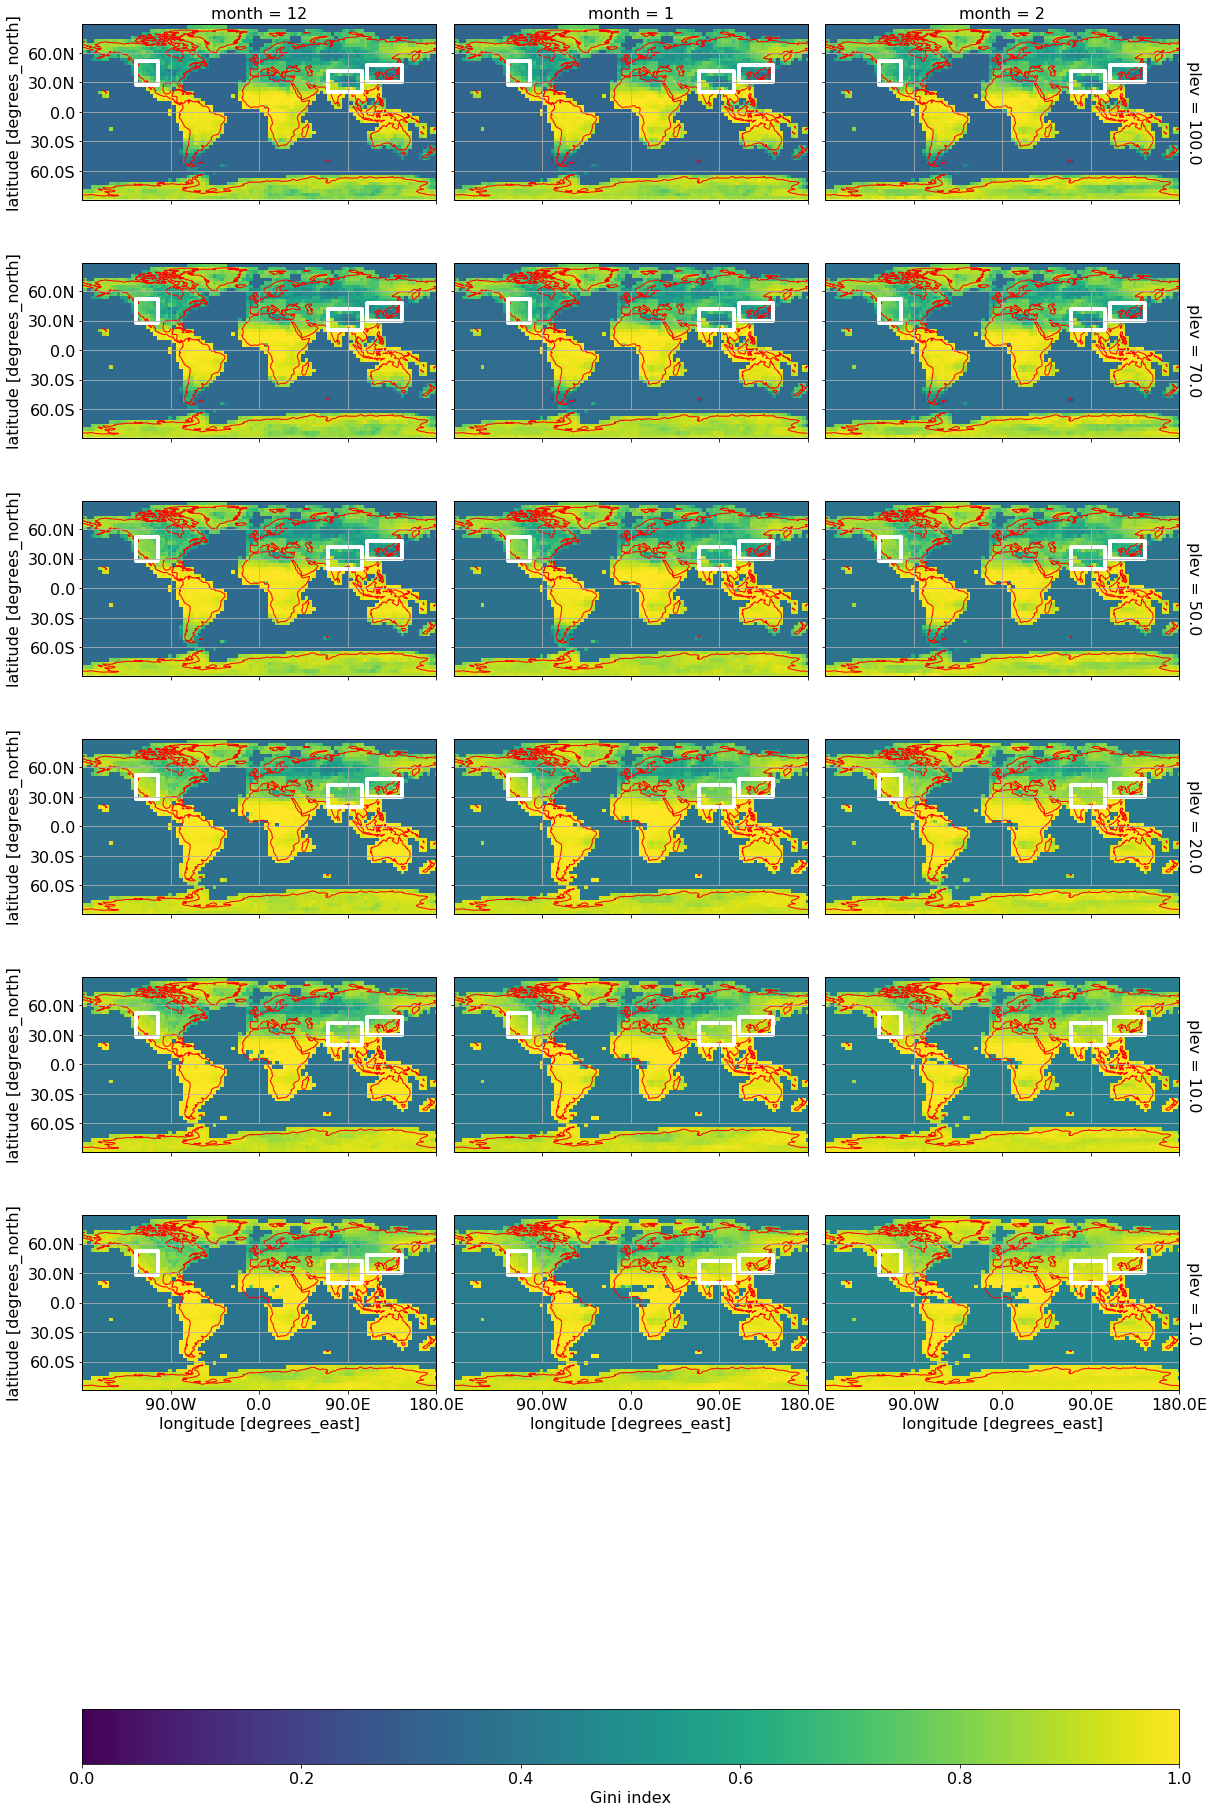

In [58]:
variable = 'oro'
months = [12,1,2]
plot_map(gini_res, variable, months, ch_plevs)